In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [21]:
## plans with persons with walk transit legs only - reading

plans = pd.read_csv("../../../beam-production/production/newyork/urbansim_v2/13122k-NYC-all-ages-14k-sample/plans.csv.gz")
plans.head()

,trip_id,person_id,PlanElementIndex,ActivityElement,trip_mode,ActivityType,x,y,departure_time
0,NaN,1603,1,activity,NaN,Home,-73.965628,40.652615,19.744722
1,NaN,1603,2,leg,NaN,NaN,NaN,NaN,NaN
2,NaN,1603,3,activity,NaN,Work,-73.881562,40.663945,23.097983
3,NaN,1603,4,leg,NaN,NaN,NaN,NaN,NaN
4,NaN,1603,5,activity,NaN,Home,-73.965628,40.652615,NaN


In [23]:
## plans with persons with walk transit legs only - getting persons

all_persons = set(plans['person_id'].unique())
walk_transit_persons = set(plans[plans['trip_mode'] == 'walk_transit']['person_id'].unique())
the_rest_persons = all_persons - walk_transit_persons
f"all: {len(all_persons)}", f"walk transit persons: {len(walk_transit_persons)}", f"the rest: {len(the_rest_persons)}"

('all: 14362', 'walk transit persons: 0', 'the rest: 14362')

In [25]:
## plans with persons with walk transit legs only - resulting DF

plans_p1 = plans[plans['person_id'].isin(walk_transit_persons)]
plans_p2 = plans[(plans['person_id'].isin(the_rest_persons)) & (plans['ActivityType'] == 'Home')]
plans_p2 = plans_p2.groupby('person_id').first().reset_index().copy()

plans_p2['departure_time'] = -np.inf
print(plans_p1.shape, plans_p2.shape)

plans_joined = pd.concat([plans_p1, plans_p2])
plans_joined

(0, 9) (14362, 9)


,trip_id,person_id,PlanElementIndex,ActivityElement,trip_mode,ActivityType,x,y,departure_time
0,NaN,1594,1,activity,NaN,Home,-73.965628,40.652615,-inf
1,NaN,1595,1,activity,NaN,Home,-73.965628,40.652615,-inf
2,NaN,1596,1,activity,NaN,Home,-73.965628,40.652615,-inf
3,NaN,1597,1,activity,NaN,Home,-73.965628,40.652615,-inf
4,NaN,1598,1,activity,NaN,Home,-73.965628,40.652615,-inf
...,...,...,...,...,...,...,...,...,...
14357,NaN,14360060,1,activity,NaN,Home,-73.905954,40.719833,-inf
14358,NaN,14360061,1,activity,NaN,Home,-73.905954,40.719833,-inf
14359,NaN,14360062,1,activity,NaN,Home,-73.905954,40.719833,-inf
14360,NaN,14360063,1,activity,NaN,Home,-73.905954,40.719833,-inf


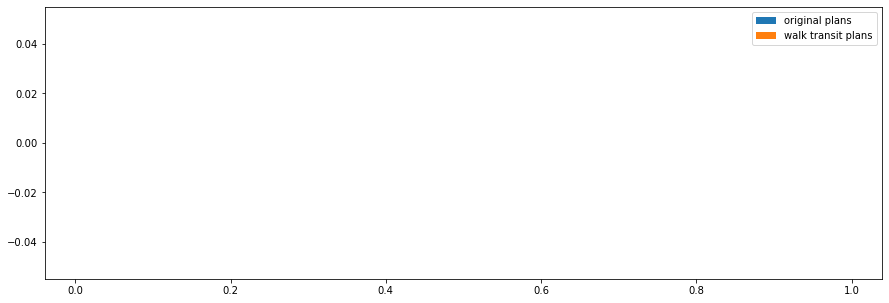

In [26]:
## plans with persons with walk transit legs only - checking mode split

hists = [plans['trip_mode'].dropna(), plans_joined['trip_mode'].dropna()]
labels = ['original plans', 'walk transit plans']
_, ax = plt.subplots(figsize=(15,5))
ax.hist(hists, label=labels)
ax.legend()

In [8]:
columns = ["trip_id","person_id","PlanElementIndex","ActivityElement","trip_mode","ActivityType","x","y","departure_time"]
plans_u = pd.read_csv("../../output/beamville_urbansim_plans.csv.gz")[columns]
plans_u.head(3)

,trip_id,person_id,PlanElementIndex,ActivityElement,trip_mode,ActivityType,x,y,departure_time
0,NaN,1,0,activity,NaN,Home,0.002696,0.014175,26159.0
1,NaN,1,1,leg,cav,NaN,NaN,NaN,NaN
2,NaN,1,2,activity,NaN,Shop,0.010050,0.014127,29094.0


In [9]:
plans = pd.read_csv("../../test/input/beamville/urbansim_v2/plans.csv.gz")[columns]
plans.head(3)

,trip_id,person_id,PlanElementIndex,ActivityElement,trip_mode,ActivityType,x,y,departure_time
0,100.0,1,1,activity,NaN,Home,166321.9,1568.87,13.75
1,NaN,1,2,leg,HOV2,NaN,NaN,NaN,NaN
2,101.0,1,3,activity,NaN,Shopping,167138.4,1117.00,15.82


<AxesSubplot:>

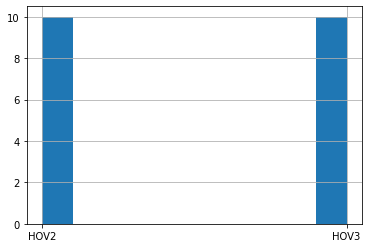

In [10]:
plans['trip_mode'].hist()

<AxesSubplot:>

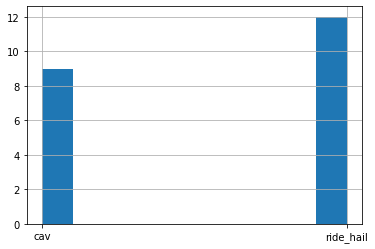

In [11]:
plans_u['trip_mode'].hist()

In [48]:
import pandas as pd
import os

base_folder = "../../output/beamville/"
subfolders = [f.path for f in os.scandir(base_folder) if f.is_dir()]

for beamville_run_full_path in subfolders:
    print(beamville_run_full_path)
    plans_it0 = pd.read_csv(f"{beamville_run_full_path}/ITERS/it.0/0.plans.csv.gz")
    value_counts_series = plans_it0['legMode'].value_counts() # plans_it0[plans_it0['planSelected']==True]['legMode'].value_counts()
    for (i,v) in value_counts_series.items():
        print(i.ljust(25), v)
    print()

../../output/beamville/beamville-walk-transit-only--replace-with-hov2_teleportation__2022-06-13_17-55-32_fds
walk_transit              228
hov2_teleportation        57
cav                       13

../../output/beamville/beamville-walk-transit-only--replace-with-hov2_teleportation-wt1000__2022-06-13_18-27-12_pkz
walk_transit              240
hov2_teleportation        46
cav                       10

../../output/beamville/beamville-walk-transit-only--replace-with-hov2_teleportation-wt100000__2022-06-13_18-52-58_age
walk_transit              240
hov2_teleportation        44
cav                       10



In [47]:
plans_it0.head(3)

,tripId,personId,planIndex,planScore,planSelected,planElementType,planElementIndex,activityType,activityLocationX,activityLocationY,activityStartTime,activityEndTime,legMode,legDepartureTime,legTravelTime,legRouteType,legRouteStartLink,legRouteEndLink,legRouteTravelTime,legRouteDistance,legRouteLinks
0,NaN,1,0,-494.580688,False,activity,0,Home,166321.9,1568.87,0.0,49500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1,0,-494.580688,False,activity,1,Work,166045.2,2705.40,49501.0,71006.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1,0,-494.580688,False,activity,2,Home,166321.9,1568.87,71007.0,-inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


walk_transit          240
hov2_teleportation     46
cav                    10
Name: legMode, dtype: int64

In [1]:
# either this:
# ! pip install <package>

# or that:
# %pip install <package>